# Загрузка Pandas и очистка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import datetime as dt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('main_task_new.csv')
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [4]:
# показывать больше строк и столбцов датасета
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) 

# приведем все названия столбцов к нижнему регистру, такой вид более привычен
df.columns = map(str.lower, df.columns)

# заменим пробелы в названиях столбцов на нижнее подчеркивание
df.columns = df.columns.str.replace(' ', '_')

# уберем квадратные скобки из столбца cuisine_style
df.cuisine_style = df.cuisine_style.str.replace('[', '')
df.cuisine_style = df.cuisine_style.str.replace(']', '')

# в столбце reviews есть значения в формате [[], []], заменим на NaN
df.loc[df['reviews'] == '[[], []]', 'reviews'] = np.nan

df.head(10)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"'European', 'French', 'International'",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"'Japanese', 'Sushi', 'Asian', 'Grill', 'Vegeta...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,NaN,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"'German', 'Central European', 'Vegetarian Frie...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"'Italian', 'Pizza'",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,'Italian',826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,NaN,/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"'Italian', 'Pizza', 'Fast Food'",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


Проверим датасет на наличие дубликатов:

In [142]:
if len(df)>len(df.drop_duplicates()):
    print('Дубликаты есть')
    display(df[df.duplicated()])
else:
    print('Дубликатов по строкам нет')

Дубликатов по строкам нет


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      40000 non-null  object 
 1   city               40000 non-null  object 
 2   cuisine_style      30717 non-null  object 
 3   ranking            40000 non-null  float64
 4   rating             40000 non-null  float64
 5   price_range        26114 non-null  object 
 6   number_of_reviews  37457 non-null  float64
 7   reviews            33529 non-null  object 
 8   url_ta             40000 non-null  object 
 9   id_ta              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Датасет состоит из данных о 40 000 ресторанов.

Категориальные признаки (после предобработки следует перевести их в dummy-переменные):
- city
- cuisine_style

Ординальные признаки (последовательные - можно представить по возрастанию):
- price_range

Числовые признаки:
- ranking
- rating
- number_of_reviews

Текст:
- id_ta 
- reviews (можно определить tone of voice)
- url_ta
- id_ta 

Сразу удалим столбцы url_ta и id_ta, так как методы парсинга мне еще неизвестны и я на данный момент не могу использовать данные из этих столбцов.

In [5]:
df = df.drop(['url_ta', 'id_ta'], axis=1)

Cразу приведем ranking к целочисленному типу данных, так как здравый смысл подсказывает, что место, занимаемое рестораном в городе, не может быть дробным.

In [6]:
df['ranking'] = df['ranking'].astype('int64')

In [7]:
# количество пропущенных значений
df.isna().sum()

restaurant_id            0
city                     0
cuisine_style         9283
ranking                  0
rating                   0
price_range          13886
number_of_reviews     2543
reviews               6471
dtype: int64

Рассмотрим столбец restaurant_id: видим, что некоторые айдишки повторяются.

In [147]:
df.drop_duplicates().restaurant_id.value_counts()

id_436      18
id_871      18
id_633      18
id_227      18
id_71       17
            ..
id_12659     1
id_8188      1
id_5694      1
id_14308     1
id_14606     1
Name: restaurant_id, Length: 11909, dtype: int64

Рассмотрим внимательнее данные о ресторане с id_633. Видим, что это одна сеть ресторанов по разным городам. Кухня, ranking, отзывы и рейтинг у каждого ресторано индивидуальны.

In [148]:
look_id_227 = df[df['restaurant_id'] == 'id_633']
look_id_227

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews
836,id_633,Milan,"'Italian', 'Pizza', 'Mediterranean', 'Vegetari...",635,3.5,$$ - $$$,743.0,[['Sunshine of Italian pizza in Milan on a we....
2927,id_633,Budapest,'Vegetarian Friendly',634,4.5,$,18.0,"[['Good qualitybreakfast and lovely venue', 'G..."
4359,id_633,Rome,"'Italian', 'Pizza', 'Fast Food', 'Mediterranea...",634,4.5,$,600.0,"[['Cheap, delicious, good service, quick', 'Gr..."
4864,id_633,Munich,"'Peruvian', 'Latin', 'South American', 'Vegeta...",640,4.0,$$ - $$$,173.0,"[['Very good but service', 'Nice!'], ['05/13/2..."
7188,id_633,Zurich,NaN,637,4.0,NaN,20.0,"[['Great coffee in Zurich!', 'Nice wine tastin..."
16630,id_633,Lyon,"'Indian', 'Pakistani', 'Middle Eastern', 'Vege...",634,4.0,$$ - $$$,115.0,"[['Warmful ambiance and good food', 'Unfortuna..."
17540,id_633,Hamburg,'Brazilian',634,4.0,$$ - $$$,36.0,"[['nice Brazilian reastaurent in Hamburg', 'Ru..."
20619,id_633,Krakow,'Pizza',634,4.5,$,5.0,NaN
24852,id_633,Paris,"'French', 'European', 'Delicatessen', 'Vegetar...",634,4.5,$$ - $$$,151.0,"[['A real find near Beaubourg', 'Exceptional f..."
25848,id_633,Madrid,"'Mediterranean', 'Spanish'",634,4.5,$$ - $$$,149.0,"[['Best show in town!', 'Awsome flamenco class..."


Можем вытянуть новый признак из данных - количество ресторанов в сети.

In [8]:
df_1 = df.restaurant_id.value_counts().reset_index()
df_1.columns = ['restaurant_id', 'restaurant_chain_quantity']
df = df.merge(df_1, on='restaurant_id')
df

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,restaurant_chain_quantity
0,id_5569,Paris,"'European', 'French', 'International'",5570,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",3
1,id_5569,Madrid,"'Mediterranean', 'Spanish'",5572,4.0,$$ - $$$,24.0,"[['Excellent food and outstanding service', 'F...",3
2,id_5569,Milan,"'Italian', 'Mediterranean', 'Vegetarian Friend...",5572,3.0,$$ - $$$,127.0,"[['Beautiful Place', 'Lovely place and atmosph...",3
3,id_1535,Stockholm,NaN,1537,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",10
4,id_1535,Edinburgh,"'Italian', 'Pizza', 'Fast Food'",1540,3.5,$$ - $$$,44.0,"[['Tasty, tasty...very, very tasty!', 'Really ...",10
...,...,...,...,...,...,...,...,...,...
39995,id_7836,London,"'Mexican', 'Latin', 'Fast Food', 'Spanish', 'S...",7845,4.0,$,40.0,"[['Give it a go if you like Mexican', 'Legit b...",1
39996,id_11658,London,"'Cafe', 'British', 'Vegetarian Friendly'",11668,3.5,$,43.0,"[['Good quality food at a reasonable price', '...",1
39997,id_7068,London,"'Bar', 'British', 'Pub'",7077,4.0,$$ - $$$,41.0,"[['Great place !', 'Surprised by this hole in ...",1
39998,id_8887,London,'International',8896,5.0,NaN,NaN,"[['I love this place!'], ['08/24/2015']]",1


Посмотрим, какой список городов и количество ресторанов в нем для нас подготовили.

In [150]:
df['city'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: city, dtype: int64

In [9]:
"""Подготовим словари для создания новых признаков на основе городов"""

# dict_population - словарь с населением в каждом городе
# capital_dict - словарь со столицами
# dict_count_rest - словарь с количеством ресторанов в каждом городе с сайта TA

dict_population = {
    'London' : 8909081,
    'Paris' : 2148271,
    'Madrid' : 3223334,
    'Barcelona' : 1620343,
    'Berlin' : 3769495,
    'Milan' : 1399860,
    'Rome' : 2860009,
    'Prague' : 1324277,
    'Lisbon' : 505526,
    'Vienna' : 2600000,
    'Amsterdam' : 872680,
    'Brussels' : 1208542,
    'Hamburg' : 1845229,
    'Munich' : 1484226,
    'Lyon' : 516092,
    'Stockholm' : 975904,
    'Budapest' : 1752286,
    'Warsaw' : 1793579,
    'Dublin' : 554554,
    'Copenhagen' : 794128,
    'Athens' : 664046,
    'Edinburgh' : 488050,
    'Zurich' : 415215,
    'Oporto' : 287591,
    'Geneva' : 201818,
    'Krakow' : 779115,
    'Oslo' : 697549,
    'Helsinki' : 656229,
    'Bratislava' : 437726,
    'Luxembourg' : 626108,
    'Ljubljana' : 295504
}

capital_dict = {'London', 'Paris', 'Madrid', 'Berlin', 'Rome', 'Prague',
          'Lisbon', 'Vienna', 'Amsterdam', 'Brussels', 'Stockholm',
          'Budapest', 'Warsaw', 'Dublin', 'Copenhagen', 'Athens',
          'Edinburgh', 'Oslo', 'Helsinki', 'Bratislava',
          'Luxembourg', 'Ljubljana'}

dict_count_rest = {
    'London' : 24150,
    'Paris' : 18824,
    'Madrid' : 8000,
    'Barcelona' : 10808,
    'Berlin' : 6478,
    'Milan' : 7616,
    'Rome' : 13138,
    'Prague' : 6225,
    'Lisbon' : 5052,
    'Vienna' : 4749,
    'Amsterdam' : 4566,
    'Brussels' : 3681,
    'Hamburg' : 3293,
    'Munich' : 3673,
    'Lyon' : 2867,
    'Stockholm' : 3086,
    'Budapest' : 3120,
    'Warsaw' : 3314,
    'Dublin' : 2391,
    'Copenhagen' : 2355,
    'Athens' : 2636,
    'Edinburgh' : 1937,
    'Zurich' : 1930,
    'Oporto' : 4455,
    'Geneva' : 1641,
    'Krakow' : 1824,
    'Oslo': 1315,
    'Helsinki' : 1573,
    'Bratislava' : 1286,
    'Luxembourg' : 743,
    'Ljubljana': 613 
}

df['population'] = df.city.map(dict_population)
df['is_capital'] = df.city.apply(lambda x: 1 if x in capital_dict else 0)
df['count_rest'] = df.city.map(dict_count_rest)

df

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,restaurant_chain_quantity,population,is_capital,count_rest
0,id_5569,Paris,"'European', 'French', 'International'",5570,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",3,2148271,1,18824
1,id_5569,Madrid,"'Mediterranean', 'Spanish'",5572,4.0,$$ - $$$,24.0,"[['Excellent food and outstanding service', 'F...",3,3223334,1,8000
2,id_5569,Milan,"'Italian', 'Mediterranean', 'Vegetarian Friend...",5572,3.0,$$ - $$$,127.0,"[['Beautiful Place', 'Lovely place and atmosph...",3,1399860,0,7616
3,id_1535,Stockholm,NaN,1537,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",10,975904,1,3086
4,id_1535,Edinburgh,"'Italian', 'Pizza', 'Fast Food'",1540,3.5,$$ - $$$,44.0,"[['Tasty, tasty...very, very tasty!', 'Really ...",10,488050,1,1937
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_7836,London,"'Mexican', 'Latin', 'Fast Food', 'Spanish', 'S...",7845,4.0,$,40.0,"[['Give it a go if you like Mexican', 'Legit b...",1,8909081,1,24150
39996,id_11658,London,"'Cafe', 'British', 'Vegetarian Friendly'",11668,3.5,$,43.0,"[['Good quality food at a reasonable price', '...",1,8909081,1,24150
39997,id_7068,London,"'Bar', 'British', 'Pub'",7077,4.0,$$ - $$$,41.0,"[['Great place !', 'Surprised by this hole in ...",1,8909081,1,24150
39998,id_8887,London,'International',8896,5.0,NaN,NaN,"[['I love this place!'], ['08/24/2015']]",1,8909081,1,24150


Рассмотрим Cuisine Style - кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане. Найдем самую часто встречаемую. Это вегетарианская кухня.

In [10]:
df.cuisine_style = df.cuisine_style.str.replace('\'', '') # уберем кавычки

df_1 = df.copy()
df_1.cuisine_style = df_1.cuisine_style.str.replace(' ', '') # уберем пробелы
df_1.cuisine_style = df_1.cuisine_style.str.split(',') # найдем строки по разделителю ','
df_1 = df_1.explode('cuisine_style')

df_1["cuisine_style"].value_counts()[:] # самая часто встречаемая кухня

VegetarianFriendly    11189
European              10060
Mediterranean          6277
Italian                5964
VeganOptions           4486
GlutenFreeOptions      4113
Bar                    3297
French                 3190
Asian                  3011
Pizza                  2849
Spanish                2798
Pub                    2449
Cafe                   2325
FastFood               1705
British                1595
International          1584
Seafood                1505
Japanese               1464
CentralEuropean        1393
American               1315
Sushi                  1156
Chinese                1145
Portuguese             1107
Indian                 1041
MiddleEastern           782
Thai                    743
WineBar                 697
German                  662
Healthy                 620
Greek                   604
Halal                   598
Czech                   595
Fusion                  577
Steakhouse              573
Barbecue                555
Contemporary        

Заменим пропуски в cuisine_style на самое часто встречаемое значение.

In [11]:
df['cuisine_style'].fillna('Vegetarian Friendly', inplace=True)

Рассмотрим столбец price_range — ценовой диапазон. Его можно представить по возрастанию, а значит это ординальный признак. То есть значения можно заменить последовательными числами: 1, 2, 3.
Как видим, больше всего ресторанов имеют средний диапазон цен.

In [12]:
df['price_range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

In [13]:
# заполнение модой (самое частовстречаемое значение)
df['price_range'].fillna('$$ - $$$', inplace=True)

# переназначим значения-доллары на цифры через словарь
dict_price = {'$' : '1', '$$ - $$$' : '2', '$$$$' : '3'}

df['price_range'] = df['price_range'].map(dict_price)
df['price_range'] = df['price_range'].astype('int64') # перевод в числовое значение

Рассмотрим столбец с количеством отзывов о ресторане "number_of_reviews" вместе с отзывами, которые отображаются на сайте ресторана "reviews". В описании к датасету не уточнили, связяны ли как-то эти отзывы. Можно предположить, что количество отзывов - это все отзывы, которые удалось найти в других источниках (не только на сайте ресторана): google, TripAdvisor, etc. Заметим, что иногда в сети есть отзывы, а на своем сайте ресторан их не публикует (возможно, они негативные?).

In [14]:
df[['number_of_reviews', 'reviews']].head(30)

,number_of_reviews,reviews
0,194.0,"[['Good food at your doorstep', 'A good hotel ..."
1,24.0,"[['Excellent food and outstanding service', 'F..."
2,127.0,"[['Beautiful Place', 'Lovely place and atmosph..."
3,10.0,"[['Unique cuisine', 'Delicious Nepalese food']..."
4,44.0,"[['Tasty, tasty...very, very tasty!', 'Really ..."
5,76.0,"[['Excellent food and service', 'Beautifully p..."
6,33.0,"[['100 percent authentic Japanese food', 'If y..."
7,87.0,"[['Dec. 27', 'This was really busy'], ['01/03/..."
8,25.0,"[['Great food, great vibes'], ['12/16/2017']]"
9,16.0,"[[""5 star is not enough . If I could I'd give...."


Посмотрим детальнее, сколько отзывов в среднем есть у ресторана, когда на сайте ресторана отзывов вообще нет:

In [15]:
df_2 = df[df['reviews'].isnull()] # фильтрация дата сета, где reviews отсутсвуют
mean_number_of_reviews = round(
    df_2['number_of_reviews'].mean()) # среднее количество отзывов при отсутствующих отзывах на сайте ресторана
mean_number_of_reviews

13

Заменим отсутствующие значения столбца number_of_reviews на среднее количество отзывов:

In [16]:
df['number_of_reviews'].fillna(mean_number_of_reviews, inplace=True)

In [17]:
# сразу приведем к целочисленному виду
df['number_of_reviews'] = df['number_of_reviews'].astype('int64')

Рассмотрим содержимое ячейки у столбца reviews. Возьмем самое первое значение. Это текст первых двух отзывов и дата их создания соответственно. Отзыв записан в формате ['text_1' , 'text_2'], дата — ['date_1', 'date_2']

In [18]:
df.reviews.iloc[0]

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [20]:
# вынесем даты отзывов в отдельный столбец
review_date = df['reviews'].str.split('], \[', expand = True)
review_date.columns = ['text', 'date']
review_date.head()

,text,date
0,"[['Good food at your doorstep', 'A good hotel ...","'12/31/2017', '11/20/2017']]"
1,"[['Excellent food and outstanding service', 'F...","'09/06/2016', '02/24/2013']]"
2,"[['Beautiful Place', 'Lovely place and atmosph...","'12/26/2017', '10/22/2017']]"
3,"[['Unique cuisine', 'Delicious Nepalese food'","'07/06/2017', '06/19/2016']]"
4,"[['Tasty, tasty...very, very tasty!', 'Really ...","'01/04/2018', '09/24/2017']]"


In [21]:
# разделим даты отзывов на отдельные столбцы, причешем

date_1 = review_date['date'].str.split(',', expand = True)
date_1.columns = ['review_date_1', 'review_date_2']
date_1.review_date_1 = date_1.review_date_1.str.replace('\'', '')
date_1.review_date_2 = date_1.review_date_2.str.replace('\'', '')
date_1.review_date_2 = date_1.review_date_2.str.replace('\]', '')
date_1.review_date_1 = date_1.review_date_1.str.replace('\]', '')

date_1.head(20)

,review_date_1,review_date_2
0,12/31/2017,11/20/2017
1,09/06/2016,02/24/2013
2,12/26/2017,10/22/2017
3,07/06/2017,06/19/2016
4,01/04/2018,09/24/2017
5,08/07/2017,08/05/2017
6,09/17/2017,03/19/2017
7,01/03/2018,05/16/2017
8,12/16/2017,None
9,10/01/2017,08/16/2015


In [22]:
# посмотрим на количество пропусков
date_1.isna().sum()

review_date_1     6471
review_date_2    11027
dtype: int64

In [23]:
date_t = date_1.copy()

In [24]:
"""Поработаем над стоблцом review_date_1"""
# заменим пропуски NaN на NaT
date_t['review_date_1'] = date_t['review_date_1'].apply(
    lambda x: pd.NaT if x is np.nan else datetime.strptime(x,"%m/%d/%Y"))

In [25]:
"""Поработаем над стоблцом review_date_2"""
# удалим пробел перед датой
date_t.review_date_2 = date_t.review_date_2.astype(str).str.replace(' ', '')

# заменим строковый nan на пустое значение
date_t.loc[date_t['review_date_2'] == 'nan', 'review_date_2'] = np.nan

# заменим пропуски nan
date_t['review_date_2'] = date_t['review_date_2'].apply(
    lambda x: pd.NaT if x is np.nan else datetime.strptime(x,"%m/%d/%Y"))

In [26]:
date_t.head(20)

,review_date_1,review_date_2
0,2017-12-31,2017-11-20
1,2016-09-06,2013-02-24
2,2017-12-26,2017-10-22
3,2017-07-06,2016-06-19
4,2018-01-04,2017-09-24
5,2017-08-07,2017-08-05
6,2017-09-17,2017-03-19
7,2018-01-03,2017-05-16
8,2017-12-16,NaT
9,2017-10-01,2015-08-16


In [27]:
# убедимся, что даты представлны в формате datetime
date_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   review_date_1  33529 non-null  datetime64[ns]
 1   review_date_2  28973 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 937.5 KB


Столбец review_date_1
Среднее: 2017-05-05 00:27:42.083560448
 Медиана: 2017-09-12 00:00:00
 Самый ранний отзыв: 2004-04-21 00:00:00
 Самый поздний отзыв: 2018-02-26 00:00:00
 Мода:2018-01-07 00:00:00

Столбец review_date_2
Среднее: 2017-02-24 18:15:22.210336768
 Медиана: 2017-07-11 00:00:00
 Самый ранний отзыв: 2007-11-14 00:00:00
 Самый поздний отзыв: 2018-02-26 00:00:00
 Мода:2018-01-03 00:00:00



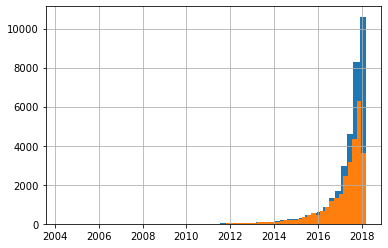

In [28]:
"""Рассмотрим распределение дат отзывов поближе"""
def date_look(col, boundaries=None):
        print('Столбец', col)
        print(
            f'Среднее: {date_t.loc[:, col].mean()}\n',
            f'Медиана: {date_t.loc[:, col].astype("datetime64[ns]").quantile(0.5, interpolation="midpoint")}\n',
            f'Самый ранний отзыв: {date_t.loc[:, col].min()}\n',
            f'Самый поздний отзыв: {date_t.loc[:, col].max()}\n',
            f'Мода:{date_t.loc[:, col].mode()[0]}\n')
        # построение гистограммы
        date_t.loc[:, col].hist(bins=50)

date_look('review_date_1')
date_look('review_date_2')

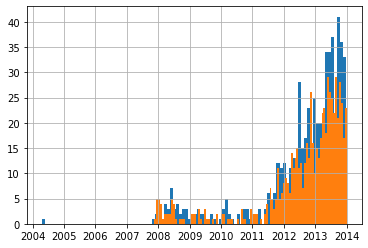

In [29]:
# подробнее рассмотрим распределение отзывов до 2014
date_t['review_date_1'][date_t['review_date_1'].dt.year < 2014].hist(bins=100);
date_t['review_date_2'][date_t['review_date_2'].dt.year < 2014].hist(bins=100);

Отзыв в 2004 похож на выброс. Либо это ошибка в данных, либо кто-то оставил отзыв в 2004 году, затем ресторан закрылся и снова открылся в 2007 (дата второго отзыва). Логично будет заменить дату 2004-04-21 00:00:00 на 2007 год.

In [30]:
date_t.review_date_1 = pd.to_datetime(
    date_t.review_date_1.astype(str).str.replace('2004-04-21', '2007-11-14 00:00:00'))

In [31]:
# проверка замены
min_new = date_t.review_date_1.min()
print("Самый ранний отзыв в первой колонке:", min_new)

Самый ранний отзыв в первой колонке: 2007-11-14 00:00:00


Заменим пропуски на медианный год.

In [32]:
date_t.review_date_1 = date_t.review_date_1.fillna(
    date_t['review_date_1'].astype('datetime64[ns]').quantile(0.5, interpolation="midpoint"))

date_t.review_date_2 = date_t.review_date_2.fillna(
    date_t['review_date_2'].astype('datetime64[ns]').quantile(0.5, interpolation="midpoint"))

In [33]:
# проверим, что пропуски убраны
date_t.isna().sum()

review_date_1    0
review_date_2    0
dtype: int64

Добавим колонку с новым признаком: количество дней, которое прошло с момента добавления самого первого отзыва до последнего, представленного в датасете.

In [34]:
date_t["dif_1"] = (date_t["review_date_1"] - min_new).dt.days
date_t["dif_2"] = (date_t["review_date_2"] - min_new).dt.days

In [35]:
date_t

,review_date_1,review_date_2,dif_1,dif_2
0,2017-12-31,2017-11-20,3700,3659
1,2016-09-06,2013-02-24,3219,1929
2,2017-12-26,2017-10-22,3695,3630
3,2017-07-06,2016-06-19,3522,3140
4,2018-01-04,2017-09-24,3704,3602
...,...,...,...,...
39995,2017-06-04,2018-01-01,3490,3701
39996,2017-10-14,2017-09-15,3622,3593
39997,2017-02-03,2017-08-16,3369,3563
39998,2015-08-24,2017-07-11,2840,3527


Возможно, полезно будет знать, оставлен ли отзыв в выходной или нет.

In [36]:
date_t['dayweek_column1'] = date_t['review_date_1'].dt.dayofweek
date_t['dayweek_column2'] = date_t['review_date_2'].dt.dayofweek

date_t['is_weekend1'] = date_t['dayweek_column1'].apply(lambda x: 1 if (x == 5) | (x == 6) else 0)
date_t['is_weekend2'] = date_t['dayweek_column2'].apply(lambda x: 1 if (x == 5) | (x == 6) else 0)
date_t['is_weekend'] = date_t['is_weekend1'] + date_t['is_weekend2']

date_t['is_weekend'] = date_t.is_weekend.astype(str).str.replace('2', '1')
date_t = date_t.drop(['is_weekend1', 'is_weekend2', 'dayweek_column1', 'dayweek_column2'], axis=1)

In [37]:
date_t

,review_date_1,review_date_2,dif_1,dif_2,is_weekend
0,2017-12-31,2017-11-20,3700,3659,1
1,2016-09-06,2013-02-24,3219,1929,1
2,2017-12-26,2017-10-22,3695,3630,1
3,2017-07-06,2016-06-19,3522,3140,1
4,2018-01-04,2017-09-24,3704,3602,1
...,...,...,...,...,...
39995,2017-06-04,2018-01-01,3490,3701,1
39996,2017-10-14,2017-09-15,3622,3593,1
39997,2017-02-03,2017-08-16,3369,3563,0
39998,2015-08-24,2017-07-11,2840,3527,0


In [38]:
# приведем к целому типу данных
date_t.is_weekend = date_t['is_weekend'].astype('int64')

In [39]:
date_t.is_weekend.value_counts()

0    23944
1    16056
Name: is_weekend, dtype: int64

Количество отзывов, оставленных в будние дни превышает количество отзывов, оставленных в выходные.

Объединим исходный датафрейм с новым куском признаков, вытащенных из дат:

In [40]:
df = pd.concat([df, date_t], axis = 1)
df = df.drop(['reviews'], axis = 1) # столбец reviews нам больше не пригодится

In [179]:
df.head(10)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,restaurant_chain_quantity,population,is_capital,count_rest,review_date_1,review_date_2,dif_1,dif_2,is_weekend
0,id_5569,Paris,"European, French, International",5570,3.5,2,194,3,2148271,1,18824,2017-12-31,2017-11-20,3700,3659,1
1,id_5569,Madrid,"Mediterranean, Spanish",5572,4.0,2,24,3,3223334,1,8000,2016-09-06,2013-02-24,3219,1929,1
2,id_5569,Milan,"Italian, Mediterranean, Vegetarian Friendly, V...",5572,3.0,2,127,3,1399860,0,7616,2017-12-26,2017-10-22,3695,3630,1
3,id_1535,Stockholm,Vegetarian Friendly,1537,4.0,2,10,10,975904,1,3086,2017-07-06,2016-06-19,3522,3140,1
4,id_1535,Edinburgh,"Italian, Pizza, Fast Food",1540,3.5,2,44,10,488050,1,1937,2018-01-04,2017-09-24,3704,3602,1
5,id_1535,Milan,"Mediterranean, European, Italian, Vegetarian F...",1537,4.0,3,76,10,1399860,0,7616,2017-08-07,2017-08-05,3554,3552,1
6,id_1535,Amsterdam,"Japanese, Asian, Sushi",1538,4.0,2,33,10,872680,1,4566,2017-09-17,2017-03-19,3595,3413,1
7,id_1535,Brussels,"Belgian, Fast Food, European",1536,3.5,1,87,10,1208542,1,3681,2018-01-03,2017-05-16,3703,3471,0
8,id_1535,Paris,Vegetarian Friendly,1536,5.0,1,25,10,2148271,1,18824,2017-12-16,2017-07-11,3685,3527,1
9,id_1535,Warsaw,Italian,1537,4.0,2,16,10,1793579,1,3314,2017-10-01,2015-08-16,3609,2832,1


Столбец: city
Уникальных значений: 31


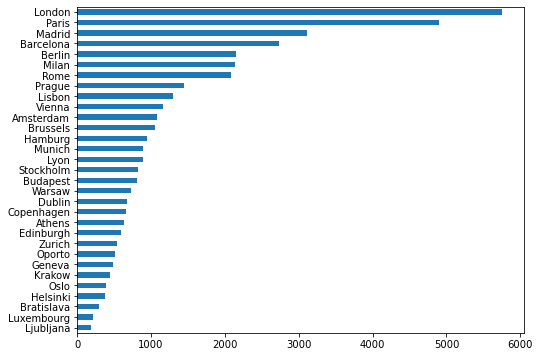

Столбец: ranking
Среднее: 3676.028525
 Медиана:2285.0
 Мода:1080
 25-й перцентиль: 973.0
 75-й перцентиль: 5260.0
 IQR: 4287.0


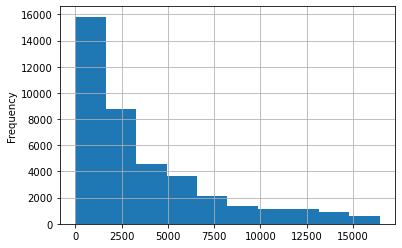

Столбец: rating
Среднее: 3.9930375
 Медиана:4.0
 Мода:4.0
 25-й перцентиль: 3.5
 75-й перцентиль: 4.5
 IQR: 1.0


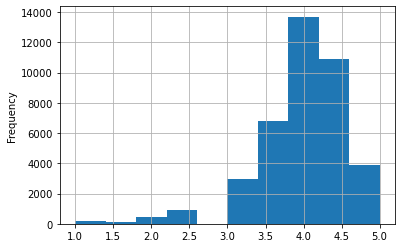

Столбец: price_range
Среднее: 1.8786
 Медиана:2.0
 Мода:2
 25-й перцентиль: 2.0
 75-й перцентиль: 2.0
 IQR: 0.0


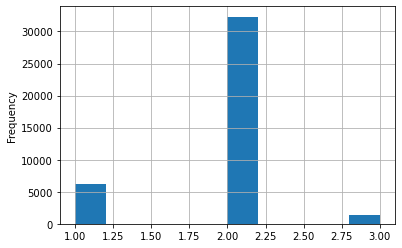

Столбец: number_of_reviews
Среднее: 117.716175
 Медиана:28.0
 Мода:13
 25-й перцентиль: 10.0
 75-й перцентиль: 105.0
 IQR: 95.0


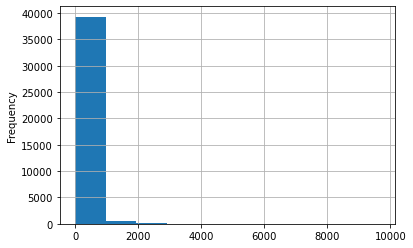

Столбец: population
Среднее: 2786492.334825
 Медиана:1845229.0
 Мода:8909081
 25-й перцентиль: 975904.0
 75-й перцентиль: 3223334.0
 IQR: 2247430.0


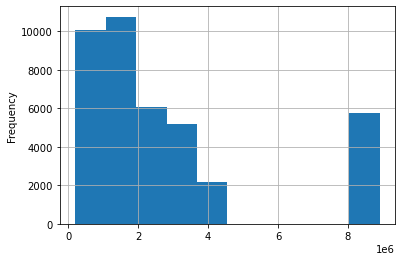

Столбец: restaurant_chain_quantity
Среднее: 6.43955
 Медиана:6.0
 Мода:1
 25-й перцентиль: 3.0
 75-й перцентиль: 10.0
 IQR: 7.0


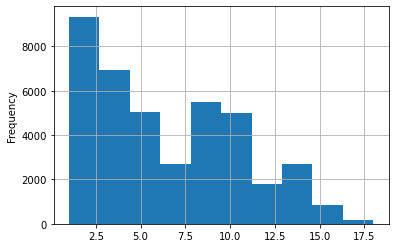

Столбец: population
Среднее: 2786492.334825
 Медиана:1845229.0
 Мода:8909081
 25-й перцентиль: 975904.0
 75-й перцентиль: 3223334.0
 IQR: 2247430.0


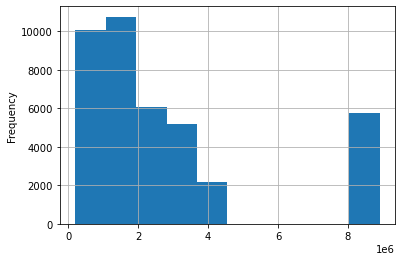

Столбец: is_capital
Среднее: 0.7606
 Медиана:1.0
 Мода:1
 25-й перцентиль: 1.0
 75-й перцентиль: 1.0
 IQR: 0.0


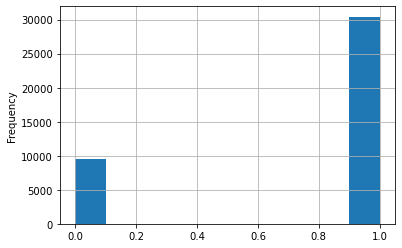

Столбец: count_rest
Среднее: 10054.321975
 Медиана:7616.0
 Мода:24150
 25-й перцентиль: 3673.0
 75-й перцентиль: 18824.0
 IQR: 15151.0


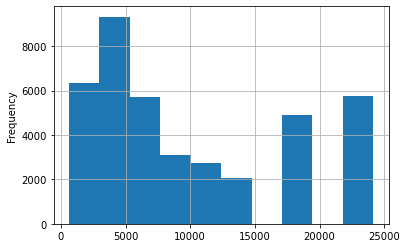

In [60]:
def first_look(col, boundaries=None):
        print('Столбец:', col)
        # построение гистограмм для категориальных признаков
        if df.loc[:, col].dtypes == np.dtype('O'):
            df.loc[:, col].value_counts(ascending=True).plot(kind='barh', fontsize=10, figsize=(8, 6)) 
            print(f'Уникальных значений: {df.loc[:, col].nunique()}')
            plt.show()
        else:
            perc25 = df.loc[:, col].quantile(0.25)
            perc75 = df.loc[:, col].quantile(0.75)
            IQR = perc75 - perc25
            print(
                f'Среднее: {df.loc[:, col].mean()}\n',
                f'Медиана:{df.loc[:, col].median()}\n',
                f'Мода:{df.loc[:, col].mode()[0]}\n',
                f'25-й перцентиль: {perc25}\n',
                f'75-й перцентиль: {perc75}\n',
                f'IQR: {IQR}')
        # построение гистограммы для количественных признаков
            df.loc[:, col].plot(kind='hist', grid=True, bins=10)
            plt.show()
        
first_look('city')
first_look('ranking')
first_look('rating')
first_look('price_range')
first_look('number_of_reviews')
first_look('population')
first_look('restaurant_chain_quantity')
first_look('population')
first_look('is_capital')
first_look('count_rest')

Рассмотрим на наличие выбросов столбец ranking:

In [124]:
# проверка, что нет значений меньше 0

np.sum(df.ranking < 0)

0

In [125]:
# полезно посмотреть максимальное место, занимаемое рестораном в городе

max_ranking = np.max(df.ranking)
max_ranking

16444

In [126]:
# посмотрим, в каком городе такой ресторан

df[df.ranking == 16444]

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,restaurant_chain_quantity,population,is_capital,count_rest,review_date_1,review_date_2,dif_1,dif_2,is_weekend
37501,id_16422,London,Vegetarian Friendly,16444,1.0,2,13,1,8909081,1,24150,2010-03-16,2017-07-11,853,3527,0


Напишем функцию, которая будет искать выбросы с помощью межквартильного размаха (IQR). Найдем выбросы в столбце ranking

In [181]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [182]:
o = outliers_iqr(df.ranking)
df.loc[o][:20] # выведем первые 20 строк таких выбросов

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,restaurant_chain_quantity,population,is_capital,count_rest,review_date_1,review_date_2,dif_1,dif_2,is_weekend
123,id_13016,London,"Bar, British, Pub",13026,3.5,2,52,2,8909081,1,24150,2017-08-05,2017-04-29,3552,3454,1
124,id_13016,Paris,Seafood,13018,3.5,3,55,2,2148271,1,18824,2017-10-13,2017-09-27,3621,3605,0
137,id_14973,London,"Cafe, British",14984,3.0,1,18,1,8909081,1,24150,2017-08-06,2017-05-09,3553,3464,1
260,id_11945,London,Pizza,11955,4.0,2,3,1,8909081,1,24150,2017-07-19,2017-02-05,3535,3371,1
518,id_13815,London,"Mexican, Fast Food, South American, Central Am...",13825,3.5,1,28,1,8909081,1,24150,2017-06-28,2017-04-14,3514,3439,0
933,id_14612,London,Vegetarian Friendly,14623,3.0,2,39,1,8909081,1,24150,2017-04-30,2017-12-11,3455,3680,1
972,id_14996,London,"British, Bar, European",15007,3.0,2,85,1,8909081,1,24150,2017-07-18,2017-05-09,3534,3464,0
1137,id_13850,London,"Pizza, Italian, Vegetarian Friendly, Vegan Opt...",13860,3.5,2,32,1,8909081,1,24150,2017-02-17,2017-09-19,3383,3597,0
1166,id_13563,London,Seafood,13573,3.5,1,6,1,8909081,1,24150,2017-05-10,2017-04-13,3465,3438,0
1275,id_16034,London,Vegetarian Friendly,16046,2.0,2,13,1,8909081,1,24150,2017-09-12,2017-07-11,3590,3527,0


Похоже, что выбросами считать такие значения не стоит. В крупных городах (Лондон, Париж) может быть около 20 тыс ресторанов. И ресторан, представленный в датасете таким низким местом вполне мог оказаться.

In [183]:
# посмотрим на количество отзывов
o = outliers_iqr(df.number_of_reviews)
df.loc[o][:20] # выведем первые 20 строк таких выбросов

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,restaurant_chain_quantity,population,is_capital,count_rest,review_date_1,review_date_2,dif_1,dif_2,is_weekend
13,id_352,London,"Japanese, Sushi, Asian, Grill, Vegetarian Frie...",353,4.5,3,688,8,8909081,1,24150,2018-01-08,2018-01-06,3708,3706,1
15,id_352,Madrid,"Mediterranean, European, Spanish, Vegetarian F...",353,4.0,2,689,8,3223334,1,8000,2017-10-25,2017-10-19,3633,3627,0
18,id_352,Dublin,"Italian, Pizza, European, Vegetarian Friendly,...",353,4.0,2,272,8,554554,1,2391,2018-01-03,2018-01-02,3703,3702,0
20,id_352,Edinburgh,"Bangladeshi, Indian, Asian, Vegetarian Friendl...",353,4.0,2,383,8,488050,1,1937,2018-01-01,2017-11-19,3701,3658,1
29,id_615,London,"American, Bar, Barbecue, Gluten Free Options",616,4.0,2,1613,14,8909081,1,24150,2017-12-30,2017-12-29,3699,3698,1
31,id_615,Milan,"Japanese, Vegetarian Friendly, Vegan Options",617,3.5,2,924,14,1399860,0,7616,2017-11-21,2017-09-20,3660,3598,0
36,id_615,Madrid,"Mexican, Latin",616,4.0,2,341,14,3223334,1,8000,2017-09-12,2017-12-16,3590,3685,1
44,id_1418,Milan,"Italian, Pizza, Seafood, Mediterranean, Vegeta...",1420,3.5,2,384,9,1399860,0,7616,2017-12-31,2017-11-30,3700,3669,1
53,id_1720,Rome,Vegetarian Friendly,1721,4.0,2,415,9,2860009,1,13138,2015-08-28,2015-03-07,2844,2670,1
58,id_825,Milan,"Chinese, Asian, Vietnamese, Vegetarian Friendly",827,4.0,1,321,10,1399860,0,7616,2017-02-09,2017-11-27,3375,3666,0


У ресторанов в городах с большим количеством населения вполне может быть около 500-1000 отзывов. Будем считать, что в этом столбце тоже нет выбросов.

Рассмотрим матрицу корреляций

<AxesSubplot:>

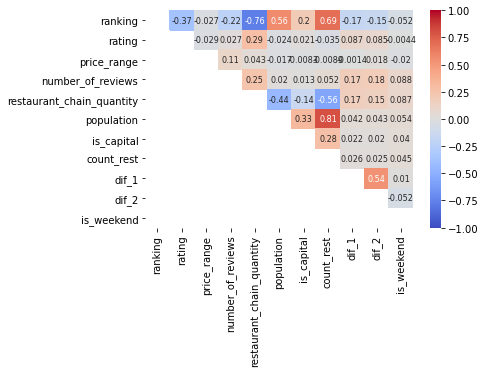

In [184]:
matrix = np.tril(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, fmt='.2g',
            vmin=-1, vmax=1, center=0, cmap='coolwarm', annot_kws={"fontsize": 8})

С целевой переменной рейтинг немного коррелирует количество ресторанов в сети. Сильную корреляцию видим между количеством населения и количеством ресторанов городе. Ну, это логично: чем больше людей в городе, тем больше заведений.

In [185]:
# Получим dummy-переменные по городам

df = pd.get_dummies(df, columns=["city"], dummy_na=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   restaurant_id              40000 non-null  object        
 1   cuisine_style              40000 non-null  object        
 2   ranking                    40000 non-null  int64         
 3   rating                     40000 non-null  float64       
 4   price_range                40000 non-null  int64         
 5   number_of_reviews          40000 non-null  int64         
 6   restaurant_chain_quantity  40000 non-null  int64         
 7   population                 40000 non-null  int64         
 8   is_capital                 40000 non-null  int64         
 9   count_rest                 40000 non-null  int64         
 10  review_date_1              40000 non-null  datetime64[ns]
 11  review_date_2              40000 non-null  datetime64[ns]
 12  dif_

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [186]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['restaurant_id', 'rating', 'cuisine_style', 'review_date_1', 'review_date_2'], axis = 1)
y = df['rating']

In [187]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [188]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [189]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [190]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [191]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20992549999999996
